In [ ]:
import pandas as pd
import numpy as np

file_path = 'countrytotal.xlsx'  
sheet_name = 'Sheet1'  
data = pd.read_excel(file_path, sheet_name=sheet_name)

features = data.iloc[:, 0:10]  

normalized = (features - features.min()) / (features.max() - features.min())

p = normalized / normalized.sum(axis=0)

k = 1 / np.log(len(features)) 
entropy = -k * (p * np.log(p + 1e-10)).sum(axis=0)  

weights = (1 - entropy) / (1 - entropy).sum()  

composite_index = (normalized * weights).sum(axis=1)

data['Composite Index'] = composite_index
output_path = 'countryfinish4.xlsx' 
data.to_excel(output_path, index=False)



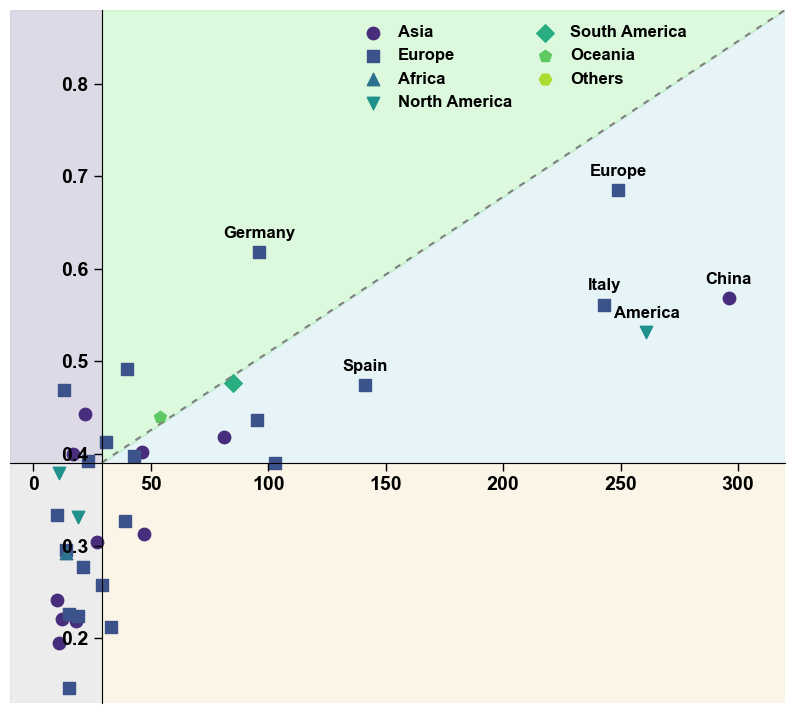

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = "countryfinish4.xlsx"
df = pd.read_excel(file_path)

x_col = 'Count'
y_col = 'Composite Index'
category_col = 'Continent'
country_col = 'Country'

x_mean = df[x_col].median()
y_mean = df[y_col].median()

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'bold'

markers = {
    'Asia': 'o', 'Europe': 's', 'Africa': '^', 'North America': 'v',
    'South America': 'D', 'Oceania': 'p', 'Others': 'H'
}
colors = sns.color_palette("viridis", len(markers))

fig, ax = plt.subplots(figsize=(10, 9))

x_min, x_max = -10, 320
y_min, y_max = 0.13, 0.88
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax.axhspan(y_mean, y_max, xmin=0, xmax=((x_mean - x_min) / (x_max - x_min)), color='#D0CADE', alpha=0.7)
ax.axhspan(y_min, y_mean, xmin=0, xmax=((x_mean - x_min) / (x_max - x_min)), color='#C2C2C2', alpha=0.3)
ax.axhspan(y_min, y_mean, xmin=((x_mean - x_min) / (x_max - x_min)), xmax=1, color='wheat', alpha=0.3)

ax.plot([x_mean, x_max], [y_mean, y_max], color="gray", linestyle=(0, (3, 3.5)), alpha=1)

tri_x = np.array([x_mean, x_max, x_max])
tri_y = np.array([y_mean, y_mean, y_max])
ax.fill(tri_x, tri_y, color='lightblue', alpha=0.3)

tri_x = np.array([x_mean, x_mean, x_max])
tri_y = np.array([y_mean, y_max, y_max])
ax.fill(tri_x, tri_y, color='lightgreen', alpha=0.3)

for i, (continent, marker) in enumerate(markers.items()):
    subset = df[df[category_col] == continent]
    ax.scatter(subset[x_col], subset[y_col], label=continent, marker=marker, color=colors[i], s=80)

ax.spines['left'].set_position(('data', x_mean))
ax.spines['bottom'].set_position(('data', y_mean))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', direction='out', length=6, width=1, labelsize=12)
ax.tick_params(axis='y', direction='out', length=6, width=1, labelsize=12)

special_countries = ['China', 'America', 'Europe', 'Italy', 'Spain', "Germany", 'Austrilia']
for _, row in df[df[country_col].isin(special_countries)].iterrows():
    ax.text(row[x_col], row[y_col] + 0.012, row[country_col], fontsize=12, fontweight='bold', color='black', ha='center', va='bottom')

plt.title("", fontsize=20, fontweight='bold')
plt.xlabel("", fontsize=18, fontweight='bold')
plt.ylabel("", fontsize=18, fontweight='bold')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(
    title="",
    fontsize=12,
    title_fontsize=14,
    ncol=2,
    loc='upper center',
    bbox_to_anchor=(0.66, 1.0),
    columnspacing=1.0,
    handletextpad=0.5,
    frameon=False
)

plt.savefig('quadrant_by_continent_colored.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
